In [1]:
from numerapi import NumerAPI
import pandas as pd
import json
import numpy as np
import pandas as pd
import torch 
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [7]:
from numerapi import NumerAPI
import pandas as pd
import json

DATA_VERSION = "v5.0"

napi = NumerAPI()
napi.download_dataset(f"{DATA_VERSION}/train.parquet")
napi.download_dataset(f"{DATA_VERSION}/features.json");

feature_metadata = json.load(open(f"{DATA_VERSION}/features.json"))
feature_cols = feature_metadata["feature_sets"]["medium"]
target_cols = feature_metadata["targets"]
training_data = pd.read_parquet(
    f"{DATA_VERSION}/train.parquet",
    columns=["era"] + feature_cols + target_cols
)

# training_data = training_data[training_data["era"].isin(training_data["era"].unique()[::4])]

training_data = training_data[-400000:]

training_data[["era"] + feature_cols]

2024-10-12 18:01:58,826 INFO numerapi.utils: target file already exists
2024-10-12 18:01:58,827 INFO numerapi.utils: download complete
2024-10-12 18:01:59,251 INFO numerapi.utils: target file already exists
2024-10-12 18:01:59,252 INFO numerapi.utils: download complete


,era,feature_able_deprived_nona,feature_ablest_inflexional_egeria,feature_absorbable_hyperalgesic_mode,feature_accoutered_revolute_vexillology,feature_acetose_crackerjack_needlecraft,feature_acheulian_conserving_output,feature_acronychal_bilobate_stevenage,feature_acrylic_gallic_wine,feature_adminicular_shod_levant,...,feature_working_jain_acromegaly,feature_wrapround_chrestomathic_timarau,feature_xanthic_transpadane_saleswoman,feature_xanthochroid_petrified_gutenberg,feature_zincy_cirrhotic_josh,feature_zippy_trine_diffraction,feature_zonal_snuffly_chemism,feature_zygotic_middlebrow_caribbean,feature_zymolytic_intertidal_privet,feature_zymotic_windswept_cooky
id,,,,,,,,,,,,,,,,,,,,,
n3f08ca57abd3577,0498,0,3,4,0,1,0,4,4,0,...,0,4,2,0,4,3,1,3,0,0
n3f1074eb097ef5d,0498,0,2,2,1,4,0,1,0,1,...,1,0,0,1,2,2,4,2,2,2
n3f15ec5d0d86df9,0498,2,3,4,2,3,1,2,2,1,...,4,2,3,0,3,4,0,0,4,3
n3f2ad9a1609bbff,0498,3,3,0,2,0,2,2,2,2,...,1,2,1,3,3,1,1,4,4,1
n3f2f96ebb3e131d,0498,4,4,2,1,1,2,4,4,3,...,4,4,1,1,3,1,1,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffcc1dbdf2212e6,0574,4,4,3,0,2,0,0,2,4,...,4,0,4,3,1,2,1,4,4,2
nffde3b371d67394,0574,4,4,3,0,2,4,1,2,4,...,3,0,4,0,2,2,2,1,3,3
nfff1a1111b35e84,0574,3,0,1,2,3,2,1,0,1,...,4,2,4,1,3,4,0,4,0,4


In [8]:
napi.download_dataset(f"{DATA_VERSION}/live.parquet")

# Load live features
live_features = pd.read_parquet(f"{DATA_VERSION}/live.parquet", columns=feature_cols)
live_features

2024-10-12 18:02:28,066 INFO numerapi.utils: starting download
v5.0/live.parquet: 8.01MB [00:00, 14.7MB/s]                            


,feature_able_deprived_nona,feature_ablest_inflexional_egeria,feature_absorbable_hyperalgesic_mode,feature_accoutered_revolute_vexillology,feature_acetose_crackerjack_needlecraft,feature_acheulian_conserving_output,feature_acronychal_bilobate_stevenage,feature_acrylic_gallic_wine,feature_adminicular_shod_levant,feature_adorable_infernal_cartesianism,...,feature_working_jain_acromegaly,feature_wrapround_chrestomathic_timarau,feature_xanthic_transpadane_saleswoman,feature_xanthochroid_petrified_gutenberg,feature_zincy_cirrhotic_josh,feature_zippy_trine_diffraction,feature_zonal_snuffly_chemism,feature_zygotic_middlebrow_caribbean,feature_zymolytic_intertidal_privet,feature_zymotic_windswept_cooky
id,,,,,,,,,,,,,,,,,,,,,
n00072ba3d909587,1,3,0,2,3,4,0,0,4,1,...,3,3,0,2,3,4,1,4,3,3
n0014a841f2f96aa,1,3,4,3,1,4,0,3,4,0,...,1,0,4,0,0,0,3,1,4,1
n002b9ed323339ac,3,3,0,3,2,3,4,3,1,1,...,1,4,3,4,3,1,3,3,2,2
n0035ac2e829b32c,2,4,3,2,4,2,4,0,4,1,...,0,4,3,0,4,4,2,4,2,0
n003f4cbf2d9d363,1,2,3,2,0,4,0,1,4,4,...,4,0,0,0,0,3,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffd99bfe8b1d4a2,3,4,1,2,3,3,4,1,0,3,...,1,4,1,4,1,0,3,4,2,4
nffe7309bae14cd8,0,1,1,2,4,0,2,2,0,2,...,1,2,3,0,2,2,1,3,2,3
nffea9f11911556a,1,0,3,1,1,4,1,2,0,0,...,1,4,1,2,3,2,1,1,0,2


In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
corr_list = {}

for feature in feature_cols:
    correlation = training_data[feature].corr(training_data['target'])
    corr_list[feature] = correlation

l = list(corr_list.values())
l.sort(reverse=True)
vals = l[:100]

final_feature = []

for feature in corr_list:
    if (corr_list[feature] in vals):
        final_feature.append(feature)

final_feature

['feature_able_deprived_nona',
 'feature_adminicular_shod_levant',
 'feature_analgesic_pensionary_exterior',
 'feature_awash_reverberative_isatin',
 'feature_axial_solutrean_pry',
 'feature_bronzy_thermoluminescent_extraversion',
 'feature_brummagem_freckliest_papaverine',
 'feature_calendrical_dextral_tantrum',
 'feature_catechetical_paragogical_accouterment',
 'feature_chattier_tight_academic',
 'feature_cheeky_african_waikiki',
 'feature_choreic_sterilized_lagune',
 'feature_contributory_slapped_swish',
 'feature_cosier_aerial_yoga',
 'feature_creative_econometric_bane',
 'feature_debonnaire_opulent_stayer',
 'feature_decuple_lowse_lahore',
 'feature_dorsal_phenological_hodograph',
 'feature_drawn_gimcrack_vulcanalia',
 'feature_egotistical_carotid_irrationality',
 'feature_epicedial_glacial_tunguska',
 'feature_fidgety_temptable_grey',
 'feature_fortified_repressed_baird',
 'feature_gnotobiotic_brittle_poultice',
 'feature_gorsy_helpable_perusing',
 'feature_haemostatic_pulpiest_pe

In [11]:
targets_df = training_data[["era","target"] + final_feature]
targets_df

,era,target,feature_able_deprived_nona,feature_adminicular_shod_levant,feature_analgesic_pensionary_exterior,feature_awash_reverberative_isatin,feature_axial_solutrean_pry,feature_bronzy_thermoluminescent_extraversion,feature_brummagem_freckliest_papaverine,feature_calendrical_dextral_tantrum,...,feature_unmovable_declassified_corrival,feature_unpitying_polyatomic_theodicy,feature_unpuckered_orgasmic_blockbuster,feature_unshadowed_biometric_chokebore,feature_upbeat_boneheaded_chequer,feature_venerable_kernelly_durham,feature_verticillated_tenured_bosch,feature_vestigial_tittering_cyan,feature_whapping_liny_prelate,feature_xanthochroid_petrified_gutenberg
id,,,,,,,,,,,,,,,,,,,,,
n3f08ca57abd3577,0498,0.00,0,0,0,1,2,1,0,0,...,0,1,4,4,1,1,2,0,4,0
n3f1074eb097ef5d,0498,0.50,0,1,0,4,0,4,1,2,...,4,3,2,0,4,2,4,0,4,1
n3f15ec5d0d86df9,0498,0.50,2,1,0,1,0,2,3,2,...,4,3,1,0,4,2,1,1,2,0
n3f2ad9a1609bbff,0498,0.50,3,2,3,4,1,4,4,2,...,2,3,4,1,2,1,1,3,1,3
n3f2f96ebb3e131d,0498,0.25,4,3,2,3,1,2,3,2,...,0,3,3,3,1,2,0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffcc1dbdf2212e6,0574,0.75,4,4,4,2,1,2,2,4,...,4,2,4,4,4,2,1,4,4,3
nffde3b371d67394,0574,0.25,4,4,4,2,2,3,1,4,...,4,2,0,3,4,1,4,3,2,0
nfff1a1111b35e84,0574,0.50,3,1,4,0,2,4,0,2,...,4,0,4,0,4,1,0,2,3,1


In [12]:
def create_dataset_with_window(Xraw, yraw, window_len: int,chunk_size=50000):

    Xraw_filled = Xraw.fillna(-1)
    yraw_filled = yraw.fillna(-1)
    
    new_data = []
    new_cols = []
    new_labels = []
    
    for col_idx in range(window_len):
        local_new_cols = [f"{col}_ts{col_idx}" for col in Xraw_filled.columns]
        new_cols.extend(local_new_cols)

    for start in tqdm(range(0, len(Xraw_filled) - window_len + 1), desc="Creating Dataset"):
        new_row_data = Xraw_filled.iloc[start : start + window_len].values.reshape(-1)
        new_label_data = yraw_filled.iloc[start + window_len - 1]
        new_data.append(new_row_data)
        new_labels.append(new_label_data)

    return pd.DataFrame(new_data, columns=new_cols).astype(float), pd.Series(new_labels).astype(float)

    


In [13]:
from tqdm import tqdm

targets_df.sort_values(by=['era'], inplace=True)
features = [f for f in targets_df.columns if f!="target" and f!="era"]

# Xraw = targets_df.iloc[:50000,2:]
# yraw = targets_df.iloc[:50000,1]
dataset_X = []
dataset_y = []
window_len = 5

for start in range(0, len(targets_df), 200000):
    Xraw = targets_df.iloc[start:start+200000,2:]
    yraw = targets_df.iloc[start:start+200000,1]
    X, y = create_dataset_with_window(Xraw, yraw, window_len)
    dataset_X.append(X)
    dataset_y.append(y)

Creating Dataset:   3%|▎         | 5866/199996 [00:00<00:06, 29543.07it/s]

Creating Dataset: 100%|██████████| 199996/199996 [00:06<00:00, 30273.77it/s]


In [14]:
X_tensor_list = []
y_tensor_list = []
batch_size = 32
num_channels = 1
sequence_length = 500

for i in range(len(dataset_X)):

    X_numpy = dataset_X[i].values
    y_numpy = dataset_y[i].values

    X_numpy = X_numpy.reshape(-1, sequence_length,num_channels)

    X_tensor = torch.tensor(X_numpy, dtype=torch.float32)
    y_tensor = torch.tensor(y_numpy, dtype=torch.float32)

    X_tensor_list.append(X_tensor)
    y_tensor_list.append(y_tensor)

In [15]:
from torch.utils.data import TensorDataset, DataLoader

dataloader_list = []

for i in range(len(X_tensor_list)):
    dataset = TensorDataset(X_tensor_list[i], y_tensor_list[i])
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
    dataloader_list.append(dataloader)

In [16]:
dl = dataloader_list[0]

for X, y in dl:
    print(X.shape, y.shape)
    break

torch.Size([32, 500, 1]) torch.Size([32])


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score
from tqdm import tqdm

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(out_channels)

        self.downsample = None
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm1d(out_channels)
            )

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)
        return out


class ClassificationResNet50(nn.Module):
    def __init__(self, input_channels, num_classes, lr):
        super(ClassificationResNet50, self).__init__()
        
        # ResNet style blocks with increasing feature maps
        self.layer1 = self._make_layer(input_channels, 64, 3, stride=1)
        self.layer2 = self._make_layer(64, 128, 4, stride=2)
        self.layer3 = self._make_layer(128, 256, 6, stride=2)
        self.layer4 = self._make_layer(256, 512, 3, stride=2)

        # Repeating residual blocks to make the architecture deeper (50 layers in total)
        self.layer5 = self._make_layer(512, 512, 4, stride=2)
        self.layer6 = self._make_layer(512, 512, 5, stride=2)

        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(512, num_classes)
        
        self.optimizer = optim.Adam(self.parameters(), lr=lr)
        self.criterion = nn.CrossEntropyLoss()

        # Mapping from float to class indices
        self.class_to_bucket = {0: 0, 0.25: 1, 0.5: 2, 0.75: 3, 1: 4}
        self.bucket_to_class = {v: k for k, v in self.class_to_bucket.items()}

        # History for tracking loss and f1_score
        self.history = {
            'loss': [],
            'f1_score': []
        }

    def _make_layer(self, in_channels, out_channels, num_blocks, stride):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride))
        for _ in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

    def train_model(self, train_loader, num_epochs, device):
        self.to(device)  # Move the model to the specified device

        for epoch in range(num_epochs):
            self.train()
            epoch_loss = 0
            all_preds = []
            all_labels = []

            for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
                inputs, labels = inputs.to(device), labels.to(device)  # Move inputs and labels to GPU

                self.optimizer.zero_grad()

                outputs = self(inputs)

                # Convert float labels to class indices
                label_indices = torch.tensor(
                    [self.class_to_bucket[val.item()] for val in labels], 
                    dtype=torch.long
                ).to(device)

                # Loss calculation
                loss = self.criterion(outputs, label_indices)

                # Backward pass and optimization
                loss.backward()
                self.optimizer.step()

                # Track loss
                epoch_loss += loss.item()

                # Predictions and metric tracking
                preds = torch.argmax(outputs, dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(label_indices.cpu().numpy())

            avg_loss = epoch_loss / len(train_loader)
            f1 = f1_score(all_labels, all_preds, average='macro')

            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, F1 Score: {f1:.4f}")

            # Store loss and F1 score history
            self.history['loss'].append(avg_loss)
            self.history['f1_score'].append(f1)

    def evaluate_model(self, test_loader, device):
        self.eval()  # Set the model to evaluation mode
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)  # Move inputs and labels to GPU
                outputs = self(inputs)

                preds = torch.argmax(outputs, dim=1)
                label_indices = torch.tensor(
                    [self.class_to_bucket[val.item()] for val in labels.cpu().numpy()],
                    dtype=torch.long
                ).to(device)
                
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(label_indices.cpu().numpy())

        f1 = f1_score(all_labels, all_preds, average='macro')
        print(f"Test F1 Score: {f1:.4f}")

    def plot_training_history(self):
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(self.history['loss'], marker='o', label='Loss')
        plt.title('Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.history['f1_score'], marker='o', label='F1 Score')
        plt.title('Training F1 Score')
        plt.xlabel('Epoch')
        plt.ylabel('F1 Score')
        plt.legend()

        plt.show()

In [21]:
input_channels = dataset_X[0].shape[1]
num_classes = 5 
lr = 0.001 
num_epochs = 10

model = ClassificationResNet50(input_channels=input_channels, num_classes=num_classes, lr=lr)
model = model.to(device)

In [22]:
for train_loader in dataloader_list:
    model.train_model(train_loader, num_epochs, device)

Epoch 1/10: 100%|██████████| 6250/6250 [03:50<00:00, 27.11it/s]


Epoch [1/10], Loss: 1.3611, F1 Score: 0.1397


Epoch 2/10: 100%|██████████| 6250/6250 [03:49<00:00, 27.22it/s]


Epoch [2/10], Loss: 1.3228, F1 Score: 0.1388


Epoch 3/10: 100%|██████████| 6250/6250 [03:49<00:00, 27.23it/s]


Epoch [3/10], Loss: 1.3030, F1 Score: 0.1367


Epoch 4/10: 100%|██████████| 6250/6250 [03:49<00:00, 27.20it/s]


Epoch [4/10], Loss: 1.2954, F1 Score: 0.1355


Epoch 5/10: 100%|██████████| 6250/6250 [03:50<00:00, 27.14it/s]


Epoch [5/10], Loss: 1.2924, F1 Score: 0.1341


Epoch 6/10: 100%|██████████| 6250/6250 [03:49<00:00, 27.21it/s]


Epoch [6/10], Loss: 1.2918, F1 Score: 0.1336


Epoch 7/10: 100%|██████████| 6250/6250 [03:49<00:00, 27.28it/s]


Epoch [7/10], Loss: 1.2909, F1 Score: 0.1335


Epoch 8/10: 100%|██████████| 6250/6250 [03:49<00:00, 27.29it/s]


Epoch [8/10], Loss: 1.2900, F1 Score: 0.1333


Epoch 9/10: 100%|██████████| 6250/6250 [03:50<00:00, 27.17it/s]


Epoch [9/10], Loss: 1.2899, F1 Score: 0.1333


Epoch 10/10: 100%|██████████| 6250/6250 [03:49<00:00, 27.23it/s]


Epoch [10/10], Loss: 1.2894, F1 Score: 0.1333


Epoch 1/10: 100%|██████████| 6250/6250 [03:49<00:00, 27.20it/s]


Epoch [1/10], Loss: 1.2891, F1 Score: 0.1334


Epoch 2/10: 100%|██████████| 6250/6250 [03:49<00:00, 27.21it/s]


Epoch [2/10], Loss: 1.2889, F1 Score: 0.1334


Epoch 3/10: 100%|██████████| 6250/6250 [03:50<00:00, 27.13it/s]


Epoch [3/10], Loss: 1.2890, F1 Score: 0.1334


Epoch 4/10: 100%|██████████| 6250/6250 [03:50<00:00, 27.11it/s]


Epoch [4/10], Loss: 1.2888, F1 Score: 0.1334


Epoch 5/10: 100%|██████████| 6250/6250 [03:50<00:00, 27.12it/s]


Epoch [5/10], Loss: 1.2885, F1 Score: 0.1334


Epoch 6/10: 100%|██████████| 6250/6250 [03:50<00:00, 27.12it/s]


Epoch [6/10], Loss: 1.2881, F1 Score: 0.1334


Epoch 7/10: 100%|██████████| 6250/6250 [03:49<00:00, 27.19it/s]


Epoch [7/10], Loss: 1.2884, F1 Score: 0.1334


Epoch 8/10: 100%|██████████| 6250/6250 [03:50<00:00, 27.17it/s]


Epoch [8/10], Loss: 1.2885, F1 Score: 0.1334


Epoch 9/10: 100%|██████████| 6250/6250 [03:49<00:00, 27.18it/s]


Epoch [9/10], Loss: 1.2884, F1 Score: 0.1334


Epoch 10/10: 100%|██████████| 6250/6250 [03:50<00:00, 27.15it/s]


Epoch [10/10], Loss: 1.2883, F1 Score: 0.1334


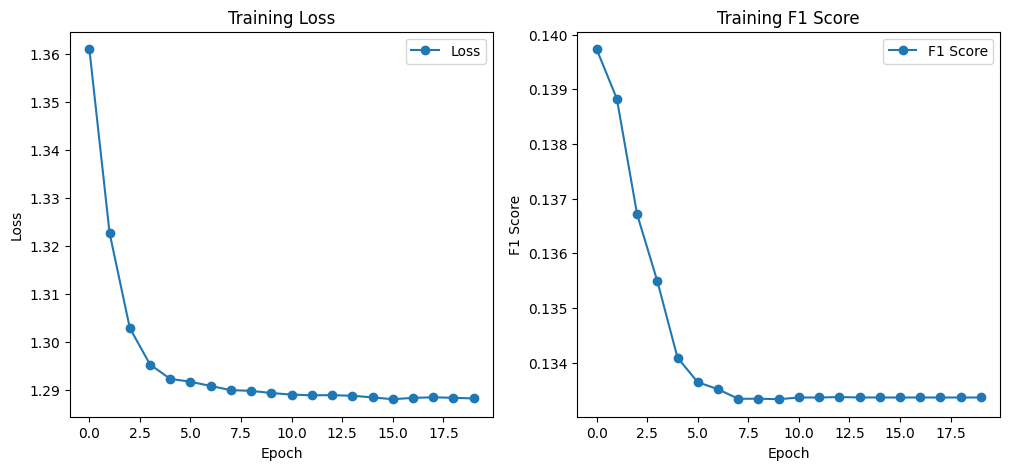

In [23]:
model.plot_training_history()